In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(145)

In [3]:
def get_dataset(name):
    """
        load any csv dataset in your directory
    """
    data = pd.read_csv(f"{name}.csv")
    return data

In [4]:
data=get_dataset('housing')
data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [5]:
data.shape

(20640, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
median = data["total_bedrooms"].median()
data["total_bedrooms"].fillna(median, inplace=True)

In [9]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       536.838857   1425.476744    499.539680       3.870671   
std        419.391878   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        643.250000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

## Data Visualization

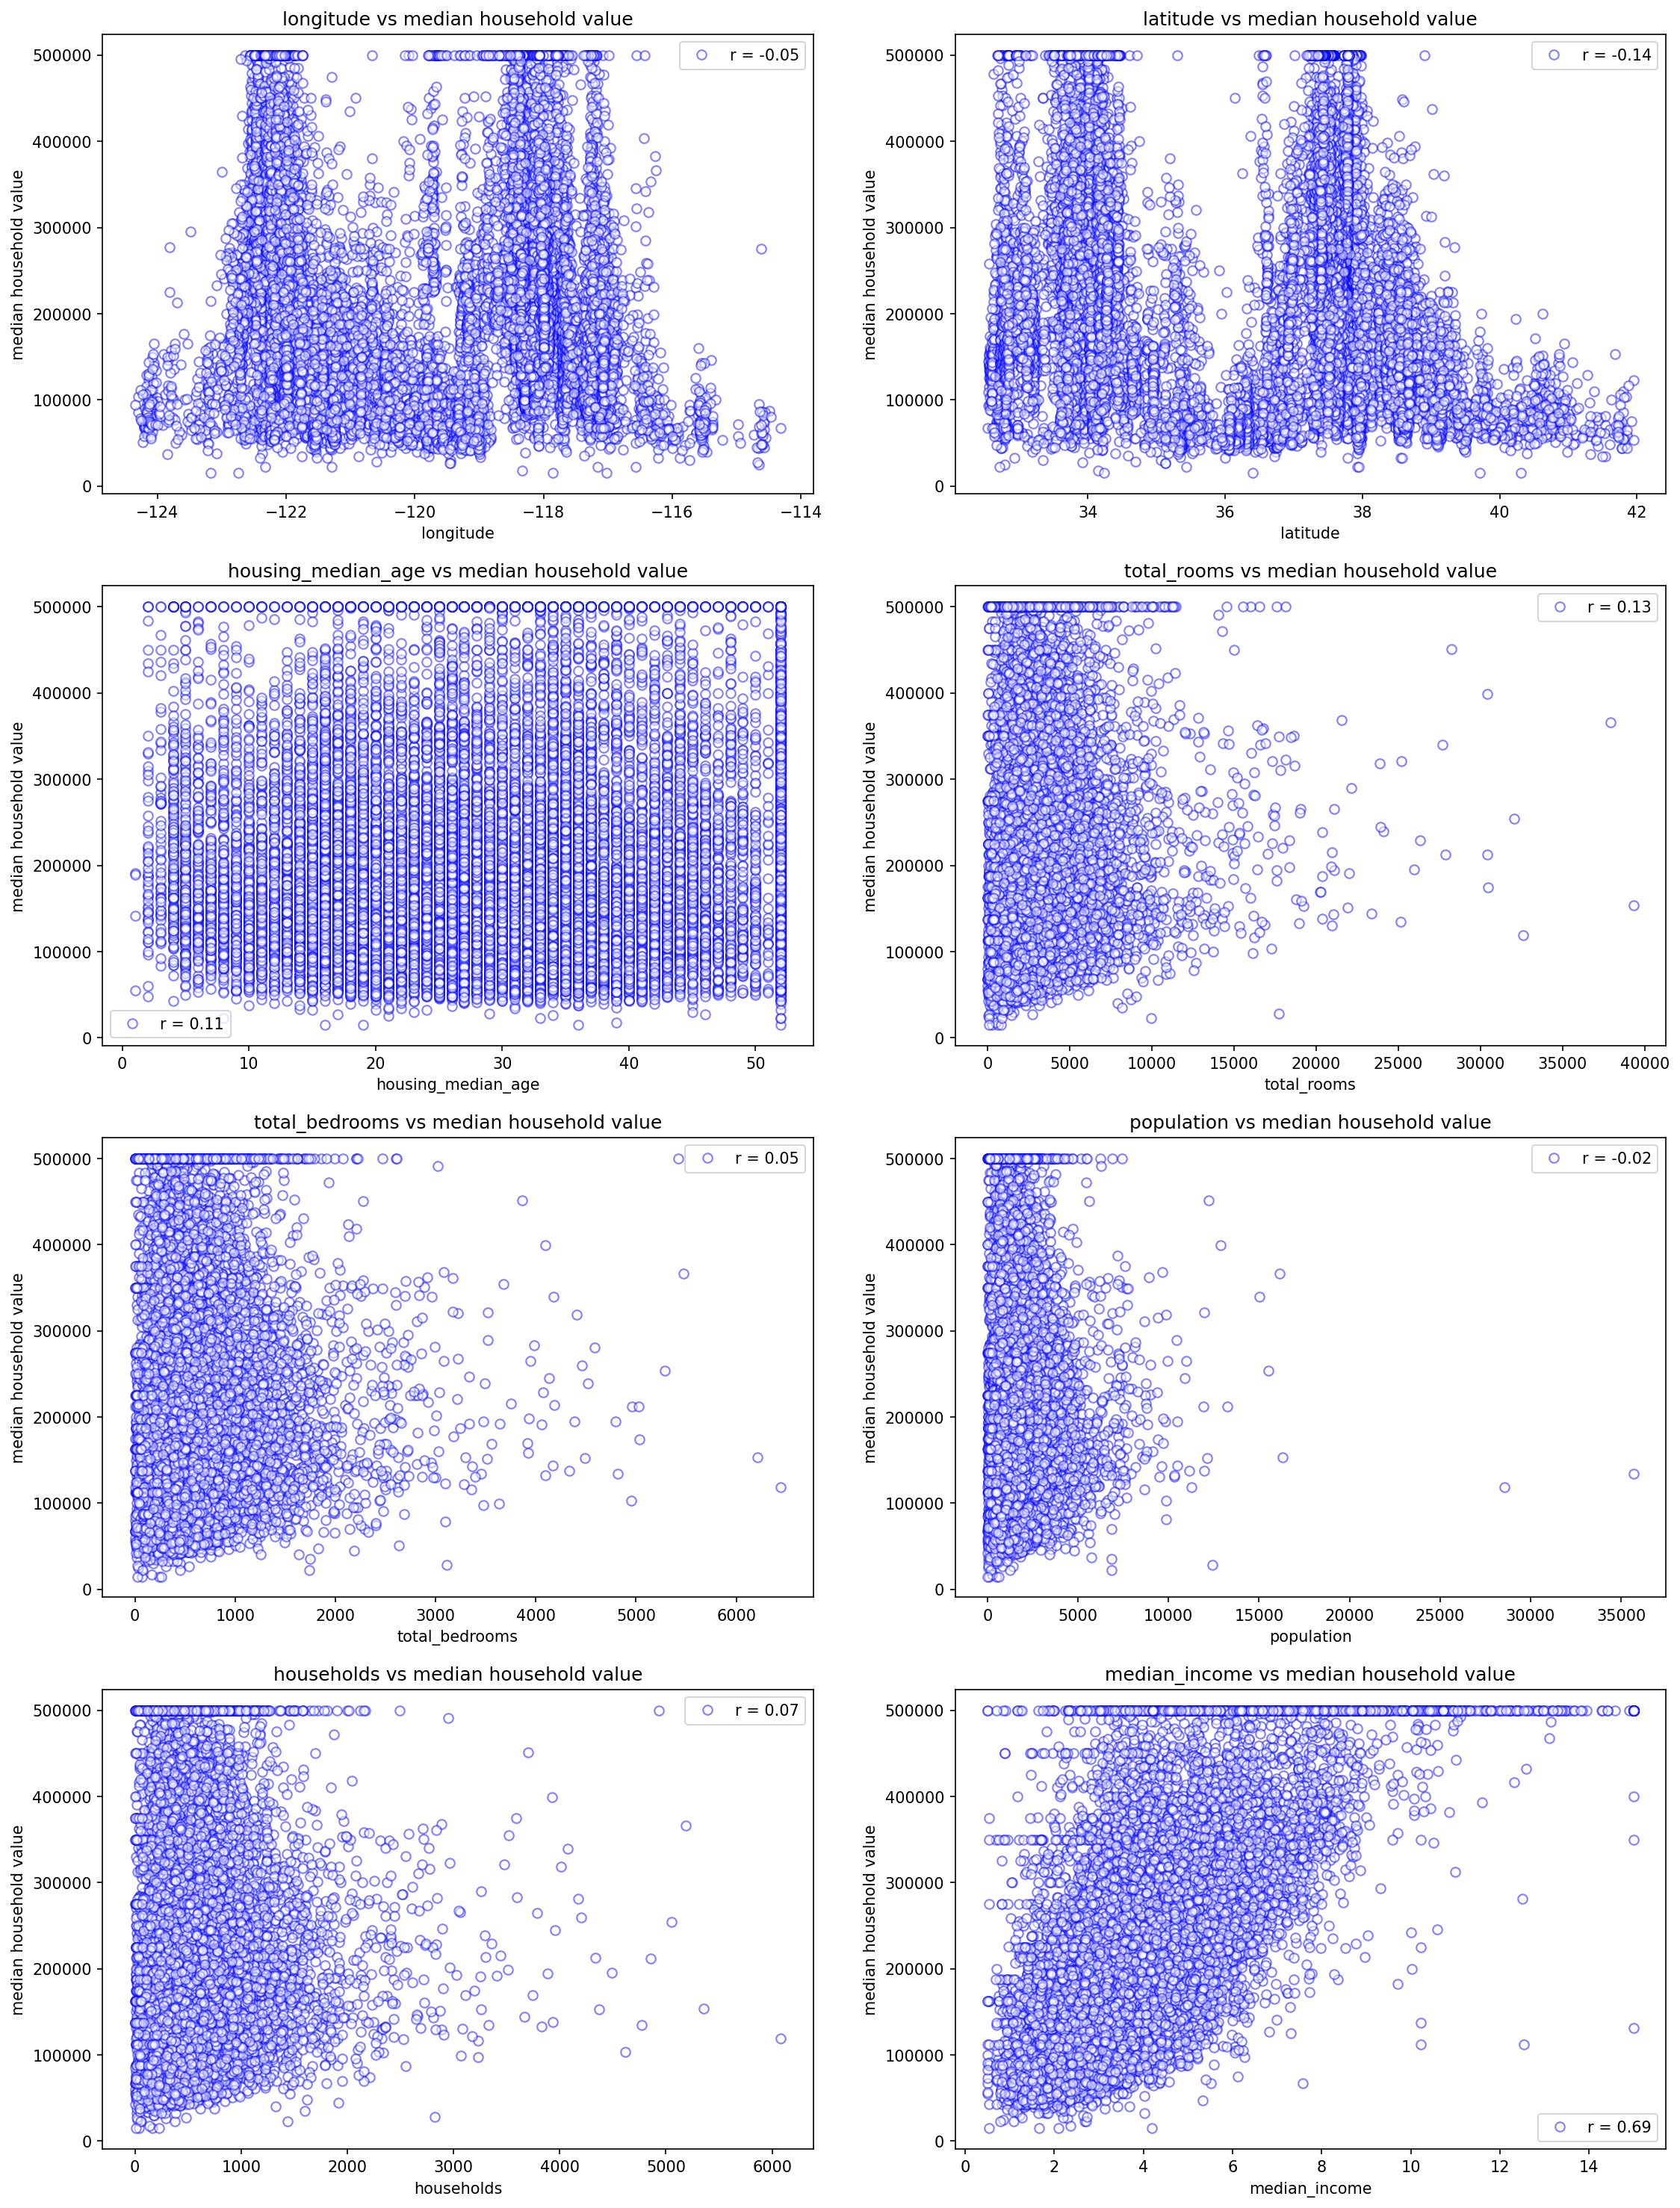

In [13]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, 
                                             figsize=(18, 25), dpi=150)

seq = zip(
    ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"],
    [ax1,              ax2,            ax3,              ax4,           ax5,             ax6,          ax7,          ax8])

for column, ax in seq:
    r = np.corrcoef(data[column], data["median_house_value"])[0, 1]
    ax.plot(data[column], data["median_house_value"], "bo", label=f"r = {r:.2f}", mfc='white', alpha=0.5)
    ax.set_title(f"{column} vs median household value")
    ax.set_xlabel(column)
    ax.set_ylabel("median household value")
    ax.legend()

plt.show()

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), dpi=150)
seq = zip(
    ["Crop_Year", "Area"],
    [ax1,              ax2])
for column, ax in seq:


In [14]:
data.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069120 -0.066484           -0.319026     0.927058   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069120    0.099773    0.055310      -0.015176   
latitude                 -0.066484   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.319026   -0.296244   -0.302916      -0.119034   
total_rooms               0.927058    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.873535    0.974366      -0.007617   
population                0.873535    1.000000    0.907222       0.004834   
households                0.974366    0.907222    1.000000       0.013033   
median_income            -0.007617    0.004834    0.013033       1.000000   
median_house_value        0.049457   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049457  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

In [15]:
data.sort_values('median_house_value',ascending=False)[['ocean_proximity','median_house_value']].reset_index()

index ocean_proximity  median_house_value
0      10667       <1H OCEAN            500001.0
1      16916      NEAR OCEAN            500001.0
2      16946      NEAR OCEAN            500001.0
3       8877       <1H OCEAN            500001.0
4       8878       <1H OCEAN            500001.0
...      ...             ...                 ...
20635   5887       <1H OCEAN             17500.0
20636   9188          INLAND             14999.0
20637   2521          INLAND             14999.0
20638   2799          INLAND             14999.0
20639  19802          INLAND             14999.0

[20640 rows x 3 columns]

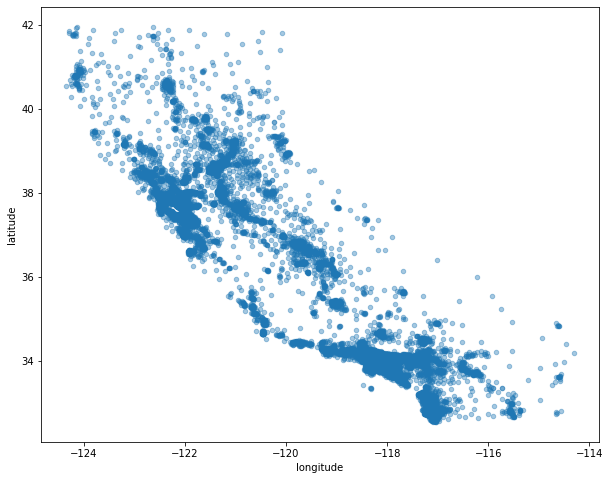

In [16]:
data.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 8), alpha=0.4)
plt.show()

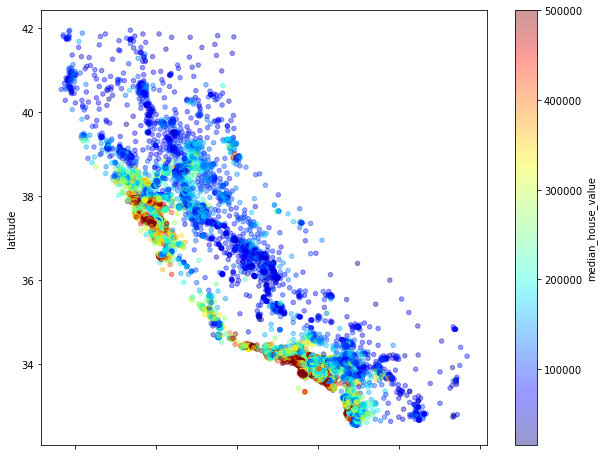

In [17]:
data.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 8), alpha=0.4,
         c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.show()

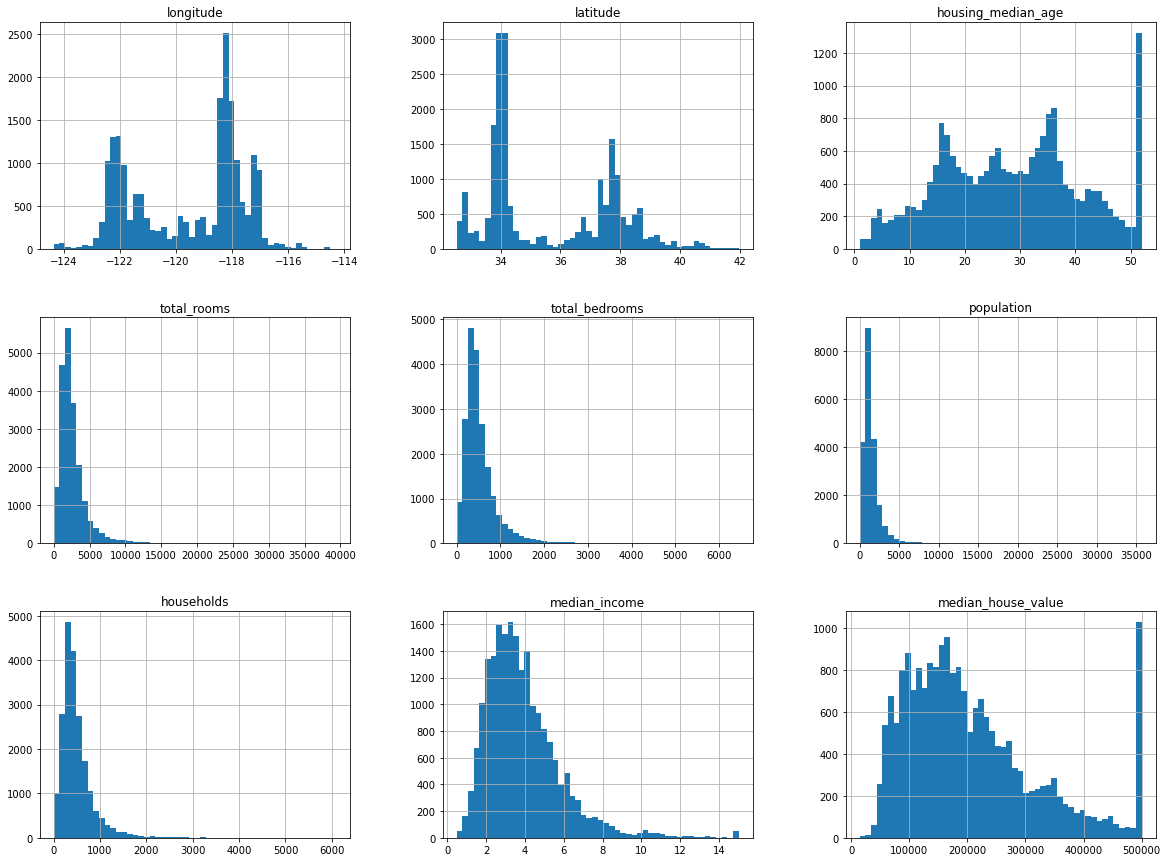

In [18]:
data.hist(bins=50, figsize=(20,15))
plt.show()

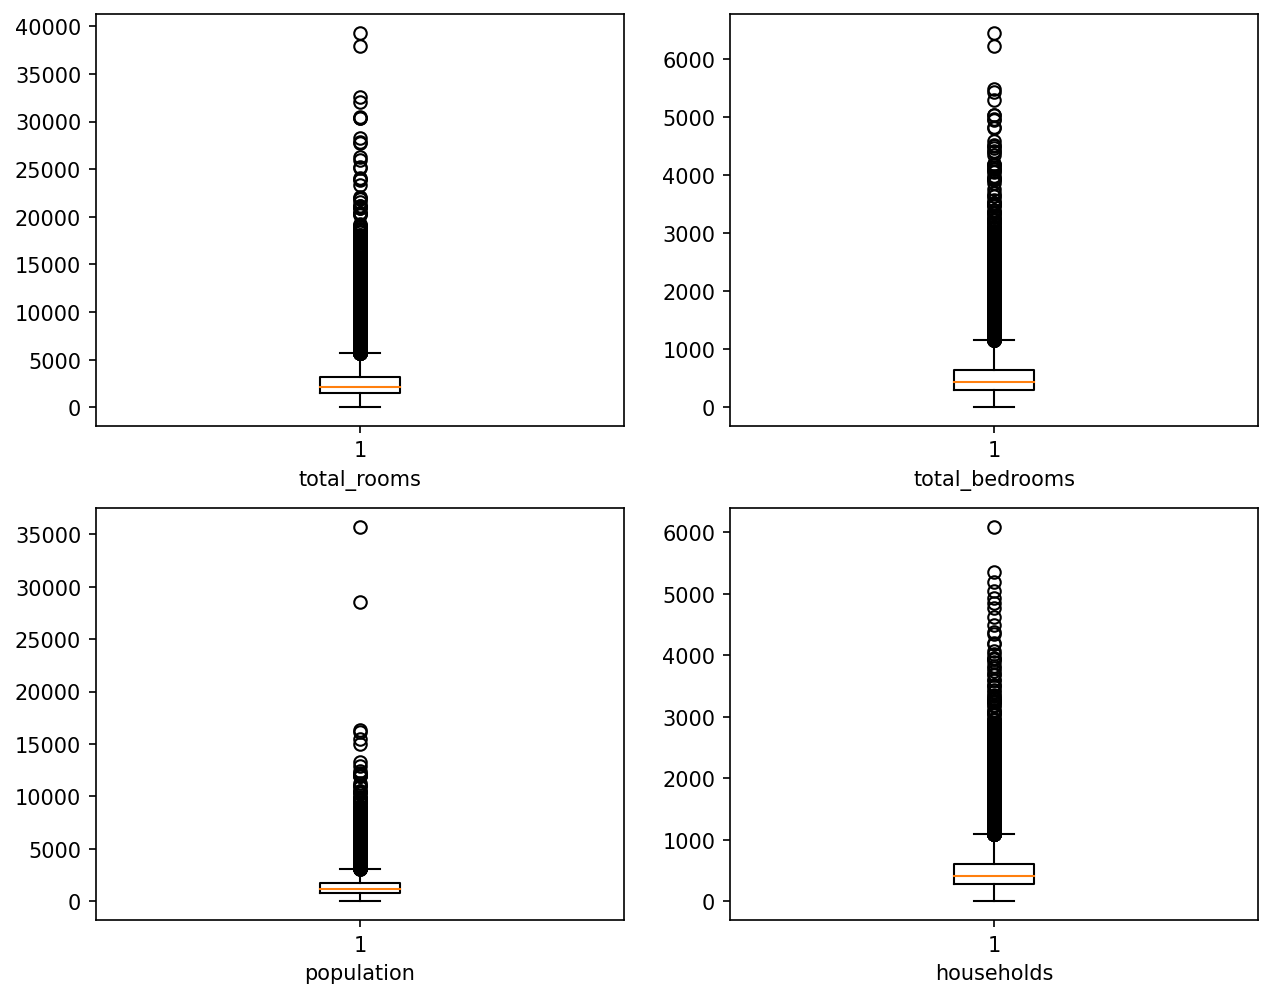

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, 
                                             figsize=(10, 8), dpi=150)
list= zip(
    ["total_rooms", "total_bedrooms", "population", "households"],
    [ax1,              ax2,            ax3,              ax4])

for column, ax in list:
    ax.boxplot(data[column])
    ax.set_xlabel(column)
plt.show()

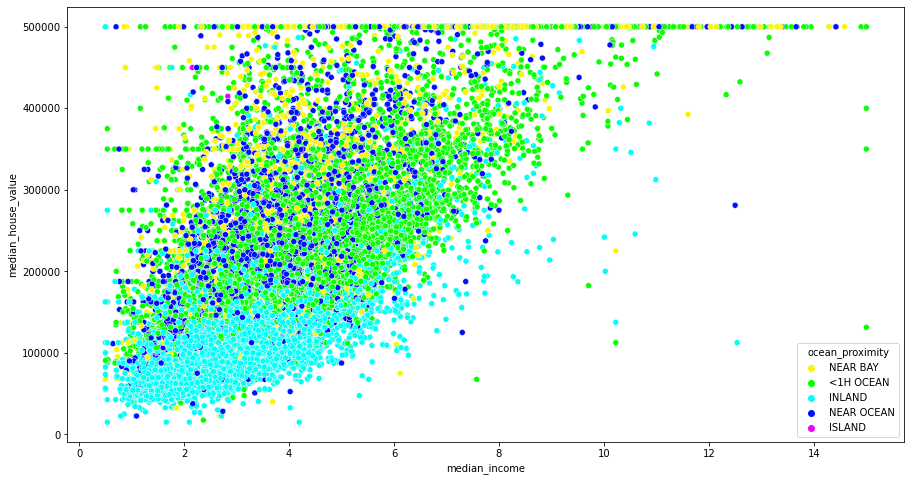

In [20]:
plt.subplots(figsize=(15,8))
sns.scatterplot(x="median_income", y="median_house_value", hue="ocean_proximity", data=data, palette="hsv")
plt.show()

## Splitting the dataset into Train and Test model

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X= data.drop('median_house_value', axis=1)
y= data['median_house_value']

In [23]:
data.shape

(20640, 10)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=145)

In [25]:
X_train.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
9738     -121.75     36.77                25.0       1851.0           418.0   
2311     -119.75     36.87                 3.0      13802.0          2244.0   
15750    -122.45     37.77                52.0       3188.0           708.0   
6953     -118.06     33.98                40.0       1723.0           370.0   
9272     -122.59     38.13                20.0       1589.0           231.0   

       population  households  median_income ocean_proximity  
9738       1678.0       390.0         3.2937       <1H OCEAN  
2311       5226.0      1972.0         5.0941          INLAND  
15750      1526.0       664.0         3.3068        NEAR BAY  
6953       1221.0       370.0         3.3562       <1H OCEAN  
9272        601.0       224.0         5.3755       <1H OCEAN

In [26]:
X_train.shape

(18576, 9)

In [27]:
X_test.shape

(2064, 9)

## Data Preprocessing

In [28]:
num_features= ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]
ordinal_feature= ["ocean_proximity"]

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [30]:
num_pipeline= Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
ordinal_pipeline= Pipeline([('encoder', OneHotEncoder())])

In [31]:
from sklearn.compose import ColumnTransformer

In [32]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [33]:
pipeline= ColumnTransformer([
    ("numerical pipeline", num_pipeline, num_features), # longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income
    ("ordinal pipeline", ordinal_pipeline, ordinal_feature) #<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'
])
output_cols= ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"]

In [34]:
X_train_tr= pipeline.fit_transform(X_train)
X_train_tr=pd.DataFrame(X_train_tr, columns=output_cols)
X_train_tr

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0      -1.087466  0.531836           -0.284774    -0.360777       -0.285500   
1      -0.089220  0.578679           -2.029226     5.090763        4.050553   
2      -1.436853  1.000271            1.856143     0.249106        0.403139   
3       0.754298 -0.775099            0.904624    -0.419165       -0.399482   
4      -1.506730  1.168908           -0.681241    -0.480290       -0.729554   
...          ...       ...                 ...          ...             ...   
18571   0.584596 -0.868786           -0.364068     0.978502        0.056445   
18572   1.982141 -1.295062           -2.029226    -0.462044       -0.525337   
18573  -0.907782  1.398441           -0.126188     1.391781        2.252967   
18574  -1.222230  1.079905           -0.760534     0.250930        0.175176   
18575  -1.102440  1.093958           -1.949933     6.564152        4.767687   

       population  households  median_income  <1H OCEAN  INLAND  ISLAND  \
0        0.220496   -0.288606      -0.302065        1.0     0.0     0.0   
1        3.340644    3.836009       0.644811        0.0     1.0     0.0   
2        0.086825    0.425771      -0.295176        0.0     0.0     0.0   
3       -0.181395   -0.340750      -0.269195        1.0     0.0     0.0   
4       -0.726629   -0.721403       0.792806        1.0     0.0     0.0   
...           ...         ...            ...        ...     ...     ...   
18571    0.198511    0.123334       4.789997        0.0     0.0     0.0   
18572   -0.371347   -0.491968       0.137398        0.0     1.0     0.0   
18573    0.797389    2.310788      -0.832882        0.0     1.0     0.0   
18574   -0.096971    0.243266       0.135137        0.0     0.0     0.0   
18575    5.474973    4.845002       0.889892        0.0     1.0     0.0   

       NEAR BAY  NEAR OCEAN  
0           0.0         0.0  
1           0.0         0.0  
2           1.0         0.0  
3           0.0         0.0  
4           0.0         0.0  
...         ...         ...  
18571       0.0         1.0  
18572       0.0         0.0  
18573       0.0         0.0  
18574       1.0         0.0  
18575       0.0         0.0  

[18576 rows x 13 columns]

In [35]:
X_test.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
7842     -118.18     33.90                32.0       1452.0           365.0   
5700     -118.25     34.23                41.0       1979.0           496.0   
17268    -119.71     34.40                36.0       1846.0           358.0   
6188     -117.92     34.10                35.0       2994.0           603.0   
17842    -121.88     37.43                31.0       2573.0           474.0   

       population  households  median_income ocean_proximity  
7842       1888.0       366.0         3.5461       <1H OCEAN  
5700       1157.0       459.0         4.4083       <1H OCEAN  
17268       748.0       329.0         4.2283      NEAR OCEAN  
6188       1933.0       561.0         4.0052       <1H OCEAN  
17842      1898.0       475.0         5.6651       <1H OCEAN

In [36]:
X_test_tr= pipeline.transform(X_test)
X_test_tr=pd.DataFrame(X_test_tr, columns= output_cols)
X_test_tr

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0      0.694403 -0.812574            0.270278    -0.542784       -0.411355   
1      0.659465 -0.657990            0.983918    -0.302389       -0.100280   
2     -0.069255 -0.578356            0.587451    -0.363058       -0.427977   
3      0.824175 -0.718887            0.508158     0.160611        0.153804   
4     -1.152352  0.841003            0.190985    -0.031431       -0.152522   
...         ...       ...                 ...          ...             ...   
2059   0.919009  0.044663            0.508158     0.125031        0.132433   
2060   0.664456 -0.812574            0.904624    -0.608471       -0.632194   
2061   1.293351 -0.798521            0.349572    -1.033609       -1.080997   
2062  -0.897800  1.590500            0.270278    -0.676894       -0.698684   
2063   0.629517 -0.723571           -0.046895    -0.876691       -0.644068   

      population  households  median_income  <1H OCEAN  INLAND  ISLAND  \
0       0.405172   -0.351179      -0.169322        1.0     0.0     0.0   
1      -0.237677   -0.108708       0.284131        1.0     0.0     0.0   
2      -0.597356   -0.447646       0.189465        0.0     0.0     0.0   
3       0.444746    0.157228       0.072131        1.0     0.0     0.0   
4       0.413966   -0.066992       0.945114        1.0     0.0     0.0   
...          ...         ...            ...        ...     ...     ...   
2059    0.389343   -0.179103      -0.127826        0.0     1.0     0.0   
2060   -0.462806   -0.635365      -0.547567        1.0     0.0     0.0   
2061   -1.020352   -1.075985      -0.899306        0.0     1.0     0.0   
2062   -0.729267   -0.713582      -0.549355        0.0     1.0     0.0   
2063   -0.471600   -0.614508      -1.036257        1.0     0.0     0.0   

      NEAR BAY  NEAR OCEAN  
0          0.0         0.0  
1          0.0         0.0  
2          0.0         1.0  
3          0.0         0.0  
4          0.0         0.0  
...        ...         ...  
2059       0.0         0.0  
2060       0.0         0.0  
2061       0.0         0.0  
2062       0.0         0.0  
2063       0.0         0.0  

[2064 rows x 13 columns]

## Machine Learning and Evaluation Metrices

In [37]:
# Evaluation Metrices
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def rmse(y, y_hat):
    return np.sqrt(mean_squared_error(y,y_hat))

In [38]:
model = LinearRegression()
model.fit(X_train_tr, y_train)
print(model.intercept_, model.coef_)

243755.2344397771 [-52381.9355465  -53381.07371048  13435.90260183 -10236.07969728
  30377.44044794 -44687.4012499   29214.01205235  73346.30743621
 -24811.3362572  -64715.03180355 136430.0767406  -27718.30861342
 -19185.40006643]


In [39]:
def generate_models_report(models, X_train_tr, y_train, X_test_tr, y_test):
    width = 116
    print("_"*width)
    title = "|{:^30}|{:^20}|{:^20}|{:^20}|{:^20}|"
    print(title.format("Model Name", "Train Error", "Test Error", "Train Accuracy", "Test Accuracy"))
    print("_"*width)
    row = "|{:^30}|{:^20.2f}|{:^20.2f}|{:^20.2f}|{:^20.2f}|"
    for model in models:
        model.fit(X_train_tr, y_train)
        y_hat_train = model.predict(X_train_tr)
        y_hat_test = model.predict(X_test_tr)
        train_error = rmse(y_train, y_hat_train)
        test_error = rmse(y_test, y_hat_test)
        train_accuracy = r2_score(y_train, y_hat_train)
        test_accuracy = r2_score(y_test, y_hat_test)
        model_name = str(model)
        print(row.format(model_name, train_error, test_error, train_accuracy*100, test_accuracy*100))
        print("-"*width)
        

In [40]:
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
models = [LinearRegression(), SGDRegressor(), SVR(), DecisionTreeRegressor(), RandomForestRegressor()]
generate_models_report(models, X_train_tr, y_train, X_test_tr, y_test)

____________________________________________________________________________________________________________________
|          Model Name          |    Train Error     |     Test Error     |   Train Accuracy   |   Test Accuracy    |
____________________________________________________________________________________________________________________
|      LinearRegression()      |      68753.96      |      68330.00      |       64.38        |       65.97        |
--------------------------------------------------------------------------------------------------------------------
|        SGDRegressor()        |      68886.43      |      68733.60      |       64.24        |       65.57        |
--------------------------------------------------------------------------------------------------------------------
|            SVR()             |     117859.89      |     120231.10      |       -4.68        |       -5.36        |
----------------------------------------------------------------

## Checking for more accuracy

In [41]:
#num_features= ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'households', 'median_income']
#ordinal_feature= ['ocean_proximity']

#numerical_pipeline= Pipeline([('imputer', SimpleImputer()), ('scaler', StandardScaler())])
#ordinal_pipeline= Pipeline([('encoder', OneHotEncoder())])

#pipeline= ColumnTransformer([
    #('numerical pipeline', numerical_pipeline, num_features),
    #('ordinal pipeline', ordinal_pipeline, ordinal_feature)
#])

#output_cols= ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'households', 'median_income',"<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN" ]

#X_train_tr= pipeline.fit_transform(X_train)
#X_train_tr= pd.DataFrame(X_train_tr, columns= output_cols)
#X_test_tr= pipeline.fit_transform(X_test)
#X_test_tr= pd.DataFrame(X_test_tr, columns= output_cols)
#models = [LinearRegression(), SGDRegressor(), SVR(), DecisionTreeRegressor(), RandomForestRegressor()]
#generate_models_report(models, X_train_tr, y_train, X_test_tr, y_test)

In [42]:
##num_features= ["housing_median_age",'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
##ordinal_feature= ['ocean_proximity']

##numerical_pipeline= Pipeline([('imputer', SimpleImputer()), ('scaler', StandardScaler())])
##ordinal_pipeline= Pipeline([('encoder', OneHotEncoder())])

##pipeline= ColumnTransformer([
    #('numerical pipeline', numerical_pipeline, num_features),
    #('ordinal pipeline', ordinal_pipeline, ordinal_feature)
#])
##output_cols= ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population','households', 'median_income',"<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN" ]

##X_train_tr= pipeline.fit_transform(X_train)
##X_train_tr= pd.DataFrame(X_train_tr, columns= output_cols)
##X_test_tr= pipeline.fit_transform(X_test)
##X_test_tr= pd.DataFrame(X_test_tr, columns= output_cols)
##models = [LinearRegression(), SGDRegressor(), SVR(), DecisionTreeRegressor(), RandomForestRegressor()]
##generate_models_report(models, X_train_tr, y_train, X_test_tr, y_test)

## Hyper-parameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV

In [85]:
params= [
    {
        'bootstrap': [False],
        'n_estimators': [160, 200, 220, 250, 300],
        'max_features': [6, 7, 8, 9, 10],
        "min_samples_split": [ 5, 10, 15, 20, 50]
    }
]

In [86]:
grid_search= GridSearchCV(RandomForestRegressor(), param_grid= params, scoring='r2')

In [87]:
grid_search.fit(X_train_tr, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False],
                          'max_features': [6, 7, 8, 9, 10],
                          'min_samples_split': [5, 10, 15, 20, 50],
                          'n_estimators': [160, 200, 220, 250, 300]}],
             scoring='r2')

In [88]:
best_model= grid_search.best_estimator_
print(best_model)

RandomForestRegressor(bootstrap=False, max_features=6, min_samples_split=5,
                      n_estimators=250)


In [89]:
accuracy= grid_search.best_score_
print(accuracy)

0.8262421620676228
